# FMCA interface

### first import modules

In [19]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import time
import FMCA

### generate data points and samplet tree
(We force NumPy to use column major arrays for performance reasons)

In [20]:
dim = 2
N = 500000
dtilde = 3
mp_deg = 4
pts = np.array(np.random.randn(dim, N), order='F')
start = time.time()
ST = FMCA.H2SampletTree(pts, dtilde, mp_deg)
stop = time.time()
print('elapsed time samplet tree construction: ', stop - start, 'sec.')
FMCA.sampletTreeStatistics(ST, pts)
# reorder points according to samplet tree order
spts = pts[:, ST.indices()]

elapsed time samplet tree construction:  1.680551290512085 sec.
------------------- Cluster tree metrics -------------------
dimension:                2
number of points:         500000
cluster splitting method: CardinalityBisection
bounding box diameter:    1.30e+01
number of clusters:       65535
fill distance:            8.50e-01
separation radius:        2.89e-06
min cluster discrepancy:  1.77e-09
max cluster discrepancy:  1.19e-01
mean cluster discrepancy: 2.30e-04
pt. mindist distribution: 
 1.64e-07|****************************************
 4.91e-07|*
 8.18e-07|*
 1.14e-06|*
 1.47e-06|*
 1.80e-06|*
 2.13e-06|*
 2.45e-06|*
 2.78e-06|*
 3.11e-06|*
 3.43e-06|*
 3.76e-06|*
 4.09e-06|
 4.42e-06|
 4.74e-06|*
discrepancy distribution: 
 3.24e-09|*
 1.08e-08|*
 3.58e-08|*
 1.19e-07|*
 3.95e-07|*
 1.31e-06|*
 4.37e-06|**
 1.45e-05|******************
 4.83e-05|****************************************
 1.61e-04|*************
 5.34e-04|****
 1.77e-03|*
 5.90e-03|*
 1.96e-02|*
 6.52e-02|*
--

### transform a given set of data vectors into samplet basis and back
(We force NumPy to use column major arrays for performance reasons)

In [21]:
start = time.time()
data = 2 * np.array(np.random.rand(N,10), order='F') - 1
Tdata = FMCA.sampletTransform(ST, data)
data2 = FMCA.inverseSampletTransform(ST, Tdata)
stop = time.time()
print('elapsed time forward and backward transform: ', stop - start, 'sec.')
print('relative error: ', la.norm(data - data2) / la.norm(data))

elapsed time forward and backward transform:  0.19219589233398438 sec.
relative error:  5.446051601857745e-16


### plot a samplet
(Basis elements can be retrieved by inverse transforming unit vectors)

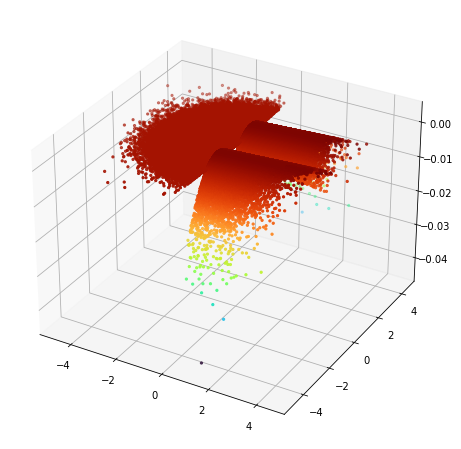

In [22]:
unit = np.array(np.zeros(N), order='F');
unit[22] = 1
Tunit = FMCA.inverseSampletTransform(ST, unit)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(spts[0,:], spts[1,:], Tunit[:,0], c=Tunit[:,0], marker='.', cmap='turbo')
plt.show()

In [ ]:
cov = FMCA.CovarianceKernel("exponential", 2)
start = time.time()
K = FMCA.sampletCompressKernel(cov, ST, pts, 0.8, 1e-4)
stop = time.time()
print('elapsed time forward and backward transform: ', stop - start, 'sec.')

In [ ]:
plt.spy(K,markersize=0.5)
plt.show()